# 2022 FIFA World Cup Predictions

Kaggle link: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?resource=download

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#previewing the data
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
#home team data
results_home = pd.read_csv('results.csv')
results_home['date'] = pd.to_datetime(results_home['date'])
results_home = results_home.rename(columns = {'home_team':'team', 
                                              'away_team':'opponent',
                                              'home_score':'team_score',
                                              'away_score':'opponent_score'})
results_home['h_or_a'] = 'Home'

#away team data
results_away = pd.read_csv('results.csv')
results_away['date'] = pd.to_datetime(results_away['date'])
results_away = results_away.rename(columns = {'home_team':'opponent', 
                                              'away_team':'team',
                                              'home_score':'opponent_score',
                                              'away_score':'team_score'})
results_away = results_away[['date', 'team', 'opponent', 'team_score', 'opponent_score', 
                             'tournament', 'city', 'country', 'neutral']]
results_away['h_or_a'] = 'Away'

#concatenating home and away team data
results = pd.concat([results_home, results_away], axis = 0)
results

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Home
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Home
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Home
...,...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Morocco,Canada,2,1,FIFA World Cup,Doha,Qatar,True,Away
44202,2022-12-02,Switzerland,Serbia,3,2,FIFA World Cup,Doha,Qatar,True,Away
44203,2022-12-02,Brazil,Cameroon,0,1,FIFA World Cup,Lusail,Qatar,True,Away
44204,2022-12-02,Uruguay,Ghana,2,0,FIFA World Cup,Al Wakrah,Qatar,True,Away


In [4]:
#shape of newly formatted data
results.shape

(88412, 10)

In [5]:
#shape of original data
df.shape

(44206, 9)

In [6]:
#number of matches
results['p'] = 1

#wins
def set_result(row):
    if row["team_score"] > row["opponent_score"]:
        return 1
    else:
        return 0
results = results.assign(w = results.apply(set_result, axis=1))

#draws
def set_result(row):
    if row["team_score"] == row["opponent_score"]:
        return 1
    else:
        return 0
results = results.assign(d = results.apply(set_result, axis=1))

#losses
def set_result(row):
    if row["team_score"] < row["opponent_score"]:
        return 1
    else:
        return 0
results = results.assign(l = results.apply(set_result, axis=1))

results

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Home,1,0,1,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Home,1,1,0,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Home,1,1,0,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Home,1,0,1,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Home,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Morocco,Canada,2,1,FIFA World Cup,Doha,Qatar,True,Away,1,1,0,0
44202,2022-12-02,Switzerland,Serbia,3,2,FIFA World Cup,Doha,Qatar,True,Away,1,1,0,0
44203,2022-12-02,Brazil,Cameroon,0,1,FIFA World Cup,Lusail,Qatar,True,Away,1,0,0,1
44204,2022-12-02,Uruguay,Ghana,2,0,FIFA World Cup,Al Wakrah,Qatar,True,Away,1,1,0,0


In [7]:
#2022 World Cup teams
wc_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 
            'England', 'Iran', 'United States', 'Wales',
            'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
            'France', 'Australia', 'Denmark', 'Tunisia',
            'Spain', 'Costa Rica', 'Germany', 'Japan',
            'Belgium', 'Canada', 'Morocco', 'Croatia',
            'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
            'Portugal', 'Ghana', 'Uruguay', 'South Korea']
results_2022_teams = results[(results['team'].isin(wc_teams)) & 
                             (results['opponent'].isin(wc_teams))]
results_2022_teams

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,Home,1,1,0,0
14,1880-03-15,Wales,England,2,3,Friendly,Wrexham,Wales,False,Home,1,0,0,1
16,1881-02-26,England,Wales,0,1,Friendly,Blackburn,England,False,Home,1,0,0,1
22,1882-03-13,Wales,England,5,3,Friendly,Wrexham,Wales,False,Home,1,1,0,0
24,1883-02-03,England,Wales,5,0,Friendly,London,England,False,Home,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Morocco,Canada,2,1,FIFA World Cup,Doha,Qatar,True,Away,1,1,0,0
44202,2022-12-02,Switzerland,Serbia,3,2,FIFA World Cup,Doha,Qatar,True,Away,1,1,0,0
44203,2022-12-02,Brazil,Cameroon,0,1,FIFA World Cup,Lusail,Qatar,True,Away,1,0,0,1
44204,2022-12-02,Uruguay,Ghana,2,0,FIFA World Cup,Al Wakrah,Qatar,True,Away,1,1,0,0


In [8]:
#matches since last World Cup
results_cur_all = results_2022_teams[(results_2022_teams['date'] >= '2018-07-16') & 
                                     (results_2022_teams['date'] <= '2022-11-19')]
results_cur_all

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
491,2018-07-18,Uruguay,Argentina,1,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,Home,1,0,1,0
492,2018-07-28,Uruguay,Argentina,3,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,Home,1,1,0,0
493,2018-08-15,Argentina,Uruguay,0,0,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,Home,1,0,1,0
494,2018-08-25,Argentina,Uruguay,2,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,Home,1,1,0,0
496,2018-09-20,Uruguay,Argentina,1,1,Copa Lipton,Montevideo,Uruguay,False,Home,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44049,2022-09-27,Spain,Portugal,1,0,UEFA Nations League,Braga,Portugal,False,Away,1,1,0,0
44087,2022-11-16,Tunisia,Iran,2,0,Friendly,Doha,Qatar,True,Away,1,1,0,0
44097,2022-11-16,Croatia,Saudi Arabia,1,0,Friendly,Riyadh,Saudi Arabia,False,Away,1,1,0,0
44106,2022-11-17,Canada,Japan,2,1,Friendly,Dubai,United Arab Emirates,True,Away,1,1,0,0


In [9]:
results_cur_all.to_csv('results_2022_teams_cur_all.csv')

In [10]:
#matches since last World Cup excluding friendlies
results_cur_cmp = results_2022_teams[(results_2022_teams['date'] >= '2018-07-16') &
                                     (results_2022_teams['date'] <= '2022-11-19') &
                                     (results_2022_teams['tournament'] != 'Friendly')]
results_cur_cmp.head()

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
491,2018-07-18,Uruguay,Argentina,1,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,Home,1,0,1,0
492,2018-07-28,Uruguay,Argentina,3,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,Home,1,1,0,0
493,2018-08-15,Argentina,Uruguay,0,0,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,Home,1,0,1,0
494,2018-08-25,Argentina,Uruguay,2,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,Home,1,1,0,0
496,2018-09-20,Uruguay,Argentina,1,1,Copa Lipton,Montevideo,Uruguay,False,Home,1,0,1,0


In [11]:
#Create data for teams in Group Stage
data = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                 'England', 'Iran', 'United States', 'Wales',
                 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                 'France', 'Australia', 'Denmark', 'Tunisia',
                 'Spain', 'Costa Rica', 'Germany', 'Japan',
                 'Belgium', 'Canada', 'Morocco', 'Croatia',
                 'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                 'Portugal', 'Ghana', 'Uruguay', 'South Korea'],
       'group': ['A','A','A','A',
                 'B','B','B','B',
                 'C','C','C','C',
                 'D','D','D','D',
                 'E','E','E','E',
                 'F','F','F','F',
                 'G','G','G','G',
                 'H','H','H','H']}
groups_team = pd.DataFrame(data)

In [12]:
#Create data for opponents in Group Stage
data = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                 'England', 'Iran', 'United States', 'Wales',
                 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                 'France', 'Australia', 'Denmark', 'Tunisia',
                 'Spain', 'Costa Rica', 'Germany', 'Japan',
                 'Belgium', 'Canada', 'Morocco', 'Croatia',
                 'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                 'Portugal', 'Ghana', 'Uruguay', 'South Korea'],
       'group': ['A','A','A','A',
                 'B','B','B','B',
                 'C','C','C','C',
                 'D','D','D','D',
                 'E','E','E','E',
                 'F','F','F','F',
                 'G','G','G','G',
                 'H','H','H','H']}
groups_opponent = pd.DataFrame(data)

In [13]:
#Create Group Stage groups
group_a = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
group_b = ['England', 'Iran', 'United States', 'Wales']
group_c = ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
group_d = ['France', 'Australia', 'Denmark', 'Tunisia']
group_e = ['Spain', 'Costa Rica', 'Germany', 'Japan']
group_f = ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_g = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_h = ['Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [14]:
#Get all matches between Group A teams since previous World Cup
results_a = results_cur_all[(results_cur_all['team'].isin(group_a)) & 
                            (results_cur_all['opponent'].isin(group_a))]
results_a

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
40489,2018-10-12,Qatar,Ecuador,4,3,Friendly,Doha,Qatar,False,Home,1,1,0,0
40489,2018-10-12,Ecuador,Qatar,3,4,Friendly,Doha,Qatar,False,Away,1,0,0,1


## Poisson Distribution amongst all World Cup teams

In [16]:
#create standings table for each team
table_group = results_cur_all[['team','p','w','d','l','team_score','opponent_score']]
table_group = table_group.rename(columns = {'team_score':'gf',
                                            'opponent_score':'ga'})
table_group = table_group.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_group['gpg_scored'] = table_group['gf'] / table_group['p']
table_group['gpg_conceded'] = table_group['ga'] / table_group['p']

table_group

,p,w,d,l,gf,ga,gpg_scored,gpg_conceded
team,,,,,,,,
Argentina,44,20,9,15,65,49,1.477273,1.113636
Australia,6,0,2,4,2,7,0.333333,1.166667
Belgium,29,15,6,8,51,37,1.758621,1.275862
Brazil,32,19,7,6,53,26,1.656250,0.812500
Cameroon,6,0,3,3,0,4,0.000000,0.666667
Canada,15,7,2,6,18,17,1.200000,1.133333
Costa Rica,19,2,5,12,11,28,0.578947,1.473684
Croatia,21,7,4,10,26,38,1.238095,1.809524
Denmark,22,8,5,9,29,28,1.318182,1.272727


In [17]:
table_group.to_csv('table_group.csv')

In [18]:
#goals scored per game for all teams
avg_goals = table_group['gf'].sum() / table_group['p'].sum()
avg_goals

1.2959501557632398

In [19]:
#goals scored per game for all teams (should be the same as goals scored per game for all teams)
table_group['ga'].sum() / table_group['p'].sum()

1.2959501557632398

In [20]:
#calculate strengths
strengths = results_cur_all.groupby(['team']).mean().sort_values('team', ascending = True)
strengths = strengths.reset_index()
strengths = strengths[['team', 'team_score', 'opponent_score']]
strengths['att'] = strengths['team_score'] / avg_goals
strengths['def'] = strengths['opponent_score'] / avg_goals
strengths = strengths[['team', 'att', 'def']]
strengths_team = strengths.rename(columns = {'att':'team_att',
                                             'def':'team_def'})
strengths_opponent = strengths.rename(columns = {'team':'opponent',
                                                 'att':'opponent_att',
                                                 'def':'opponent_def'})
strengths

,team,att,def
0,Argentina,1.139915,0.859320
1,Australia,0.257212,0.900240
2,Belgium,1.357013,0.984499
3,Brazil,1.278020,0.626953
4,Cameroon,0.000000,0.514423
5,Canada,0.925962,0.874519
6,Costa Rica,0.446736,1.137146
7,Croatia,0.955357,1.396291
8,Denmark,1.017155,0.982080
9,Ecuador,0.728766,1.414663


In [21]:
strengths_groups = pd.merge(groups_team, strengths, on = 'team')
strengths_groups

,team,group,att,def
0,Qatar,A,0.685897,1.543269
1,Ecuador,A,0.728766,1.414663
2,Senegal,A,0.771635,0.964543
3,Netherlands,A,1.388942,1.003125
4,England,B,1.049423,0.679038
5,Iran,B,0.578726,1.060998
6,United States,B,0.799193,0.688959
7,Wales,B,0.561189,1.367898
8,Argentina,C,1.139915,0.859320
9,Saudi Arabia,C,0.178070,0.534209


In [22]:
#show average goals scored by World Cup since 1974
wc_goals = pd.read_csv('results.csv')
wc_goals['date'] = pd.to_datetime(wc_goals['date'])
wc_goals = wc_goals[(wc_goals['date'] <= '2018-07-16') & 
                    (wc_goals['date'] >= '1972-01-01') & 
                    (wc_goals['tournament'] == 'FIFA World Cup')]
wc_goals['date'] = pd.DatetimeIndex(wc_goals['date']).year
wc_goals = wc_goals.drop('neutral', axis = 1)
wc_goals['both_scores'] = (wc_goals['home_score'] + wc_goals['away_score']) / 2
wc_goals = wc_goals.groupby(by = 'date').mean().sort_values('date')
wc_goals = wc_goals.reset_index()
wc_goals

,date,home_score,away_score,both_scores
0,1974,1.500000,1.052632,1.276316
1,1978,1.473684,1.210526,1.342105
2,1982,1.826923,0.980769,1.403846
3,1986,1.461538,1.076923,1.269231
4,1990,1.269231,0.942308,1.105769
5,1994,1.576923,1.134615,1.355769
6,1998,1.578125,1.093750,1.335938
7,2002,1.421875,1.093750,1.257812
8,2006,1.390625,0.906250,1.148438
9,2010,1.203125,1.062500,1.132812


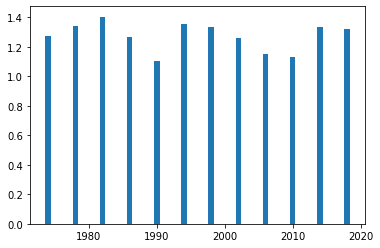

In [23]:
#create bar graph of average goals scored by World Cup since 1974
plt.bar(wc_goals['date'], wc_goals['both_scores'])
plt.show()

## Actual Round of 16 Teams, Poisson for Remaining Games

In [24]:
data = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                 'England', 'Iran', 'United States', 'Wales',
                 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                 'France', 'Australia', 'Denmark', 'Tunisia',
                 'Spain', 'Costa Rica', 'Germany', 'Japan',
                 'Belgium', 'Canada', 'Morocco', 'Croatia',
                 'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                 'Portugal', 'Ghana', 'Uruguay', 'South Korea'],
       'Pos': [ 'A4','A3','A2','A1',
                'B1','B3','B2','B4',
                'C1','C4','C3','C2',
                'D1','D2','D4','D3',
                'E2','E4','E3','E1',
                'F3','F4','F1','F2',
                'G1','G4','G2','G3',
                'H1','H4','H3','H2']}
group_stage_mk = pd.DataFrame(data)
group_stage_mk.sort_values('Pos', ascending = True)

,team,Pos
3,Netherlands,A1
2,Senegal,A2
1,Ecuador,A3
0,Qatar,A4
4,England,B1
6,United States,B2
5,Iran,B3
7,Wales,B4
8,Argentina,C1
11,Poland,C2


In [25]:
#calculate attacking and defensive strengths for each team
group_a_mk = group_stage_mk[(group_stage_mk['Pos'] == 'A1') | (group_stage_mk['Pos'] == 'A2')]
group_b_mk = group_stage_mk[(group_stage_mk['Pos'] == 'B1') | (group_stage_mk['Pos'] == 'B2')]
group_c_mk = group_stage_mk[(group_stage_mk['Pos'] == 'C1') | (group_stage_mk['Pos'] == 'C2')]
group_d_mk = group_stage_mk[(group_stage_mk['Pos'] == 'D1') | (group_stage_mk['Pos'] == 'D2')]
group_e_mk = group_stage_mk[(group_stage_mk['Pos'] == 'E1') | (group_stage_mk['Pos'] == 'E2')]
group_f_mk = group_stage_mk[(group_stage_mk['Pos'] == 'F1') | (group_stage_mk['Pos'] == 'F2')]
group_g_mk = group_stage_mk[(group_stage_mk['Pos'] == 'G1') | (group_stage_mk['Pos'] == 'G2')]
group_h_mk = group_stage_mk[(group_stage_mk['Pos'] == 'H1') | (group_stage_mk['Pos'] == 'H2')]
gw_mk = pd.concat([group_a_mk, group_b_mk, group_c_mk, group_d_mk, 
                   group_e_mk, group_f_mk, group_g_mk, group_h_mk], axis = 0)
#gw_mk = gw_mk.drop(['group','rank','total_points','rank_avg','total_points_avg'], axis = 1)

results_gw_mk = results_cur_all[(results_cur_all['team'].isin(gw_mk['team'])) & (results_cur_all['opponent'].isin(gw_mk['team']))]
results_gw_mk = results_gw_mk.sort_values(['date','h_or_a'], ascending = [True, False])
results_gw_mk.to_csv('results_gw_mk.csv')

table_gw_mk = results_gw_mk[['team','p','w','d','l','team_score','opponent_score']]
table_gw_mk = table_gw_mk.rename(columns = {'team_score':'gf', 'opponent_score':'ga'})
table_gw_mk = table_gw_mk.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_gw_mk['gpg_scored'] = table_gw_mk['gf'] / table_gw_mk['p']
table_gw_mk['gpg_conceded'] = table_gw_mk['ga'] / table_gw_mk['p']

avg_goals = table_gw_mk['gf'].sum() / table_gw_mk['p'].sum()

strengths_gw_mk = results_gw_mk.groupby(['team']).mean().sort_values('team', ascending = True)
strengths_gw_mk = strengths_gw_mk.reset_index()
strengths_gw_mk = strengths_gw_mk[['team', 'team_score', 'opponent_score']]
strengths_gw_mk['att'] = strengths_gw_mk['team_score'] / avg_goals
strengths_gw_mk['def'] = strengths_gw_mk['opponent_score'] / avg_goals
strengths_gw_mk = strengths_gw_mk[['team', 'att', 'def']]

strengths_gw_mk.to_csv('strengths_gw_mk.csv')

strengths_gw_mk

,team,att,def
0,Argentina,0.696833,0.823529
1,Australia,0.380090,1.140271
2,Brazil,1.187783,0.570136
3,Croatia,0.977376,1.737557
4,England,1.076923,0.696833
5,France,1.031674,1.248869
6,Japan,1.140271,0.380090
7,Morocco,0.760181,1.266968
8,Netherlands,1.266968,0.950226
9,Poland,0.760181,1.266968


In [26]:
#round of 16
round_16 = {'Match':['49','50','53','54','51','52','55','56'],
           'Group_Winner':['A1','C1','E1','G1','B1','D1','F1','H1'],
           'Group_Runner_Up':['B2','D2','F2','H2','A2','C2','E2','G2']}
round_16 = pd.DataFrame(round_16)

round_16 = pd.merge(round_16, group_stage_mk, left_on = 'Group_Winner', right_on = 'Pos')
round_16 = pd.merge(round_16, group_stage_mk, left_on = 'Group_Runner_Up', right_on = 'Pos')
round_16 = round_16.drop(['Pos_x','Pos_y'], axis = 1)
round_16 = round_16.rename(columns = {'team_x':'Home', 'team_y':'Away'})

round_16 = pd.merge(round_16, strengths_gw_mk, left_on = 'Home', right_on = 'team')
round_16 = pd.merge(round_16, strengths_gw_mk, left_on = 'Away', right_on = 'team')
round_16 = round_16.drop(['team_x','team_y'], axis = 1)
round_16 = round_16.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

round_16['Home_xG'] = round_16['Home_Att'] * round_16['Away_Def'] * avg_goals
round_16['Away_xG'] = round_16['Away_Att'] * round_16['Home_Def'] * avg_goals
round_16['Home_Score'] = round_16['Home_xG'].round()
round_16['Away_Score'] = round_16['Away_xG'].round()

round_16['Winner'] = np.where(round_16['Home_xG'] > round_16['Away_xG'], round_16['Home'],
                     np.where(round_16['Home_xG'] < round_16['Away_xG'], round_16['Away'], 'Draw'))

round_16

,Match,Group_Winner,Group_Runner_Up,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,49,A1,B2,Netherlands,United States,1.266968,0.950226,0.608145,1.368326,2.280543,0.760181,2.0,1.0,Netherlands
1,50,C1,D2,Argentina,Australia,0.696833,0.823529,0.380090,1.140271,1.045249,0.411765,1.0,0.0,Argentina
2,53,E1,F2,Japan,Croatia,1.140271,0.380090,0.977376,1.737557,2.606335,0.488688,3.0,0.0,Japan
3,54,G1,H2,Brazil,South Korea,1.187783,0.570136,0.506787,1.520362,2.375566,0.380090,2.0,0.0,Brazil
4,51,B1,A2,England,Senegal,1.076923,0.696833,0.760181,1.520362,2.153846,0.696833,2.0,1.0,England
5,52,D1,C2,France,Poland,1.031674,1.248869,0.760181,1.266968,1.719457,1.248869,2.0,1.0,France
6,55,F1,E2,Morocco,Spain,0.760181,1.266968,1.360324,0.800191,0.800191,2.267206,1.0,2.0,Spain
7,56,H1,G2,Portugal,Switzerland,1.073197,0.760181,0.894331,1.073197,1.515101,0.894331,2.0,1.0,Portugal


In [27]:
#calculate attacking and defensive strengths for each team
gw_mk = round_16[['Winner']]
#gw_mk = gw_mk.drop(['group','rank','total_points','rank_avg','total_points_avg'], axis = 1)

results_gw_mk = results_cur_all[(results_cur_all['team'].isin(gw_mk['Winner'])) & (results_cur_all['opponent'].isin(gw_mk['Winner']))]
results_gw_mk = results_gw_mk.sort_values(['date','h_or_a'], ascending = [True, False])
#results_gw_mk.to_csv('results_gw_mk.csv')

table_gw_mk = results_gw_mk[['team','p','w','d','l','team_score','opponent_score']]
table_gw_mk = table_gw_mk.rename(columns = {'team_score':'gf', 'opponent_score':'ga'})
table_gw_mk = table_gw_mk.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_gw_mk['gpg_scored'] = table_gw_mk['gf'] / table_gw_mk['p']
table_gw_mk['gpg_conceded'] = table_gw_mk['ga'] / table_gw_mk['p']

avg_goals = table_gw_mk['gf'].sum() / table_gw_mk['p'].sum()

strengths_gw_mk = results_gw_mk.groupby(['team']).mean().sort_values('team', ascending = True)
strengths_gw_mk = strengths_gw_mk.reset_index()
strengths_gw_mk = strengths_gw_mk[['team', 'team_score', 'opponent_score']]
strengths_gw_mk['att'] = strengths_gw_mk['team_score'] / avg_goals
strengths_gw_mk['def'] = strengths_gw_mk['opponent_score'] / avg_goals
strengths_gw_mk = strengths_gw_mk[['team', 'att', 'def']]

strengths_gw_mk.to_csv('strengths_gw_mk.csv')

strengths_gw_mk

,team,att,def
0,Argentina,0.802139,1.042781
1,Brazil,1.029412,0.735294
2,England,1.470588,2.058824
3,France,0.772059,1.654412
4,Japan,0.000000,0.882353
5,Netherlands,1.764706,0.735294
6,Portugal,0.490196,0.784314
7,Spain,1.323529,0.794118


In [28]:
#quarter-finals
quarters = {'Match':['57','58','59','60'],
            'Home_N':['49','53','51','55'],
            'Away_N':['50','54','52','56']}
quarters = pd.DataFrame(quarters)

quarters = pd.merge(quarters, round_16, left_on = 'Home_N', right_on = 'Match')
quarters = pd.merge(quarters, round_16, left_on = 'Away_N', right_on = 'Match')
quarters = quarters[['Match_x','Winner_x','Winner_y']]
quarters = quarters.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

quarters = pd.merge(quarters, strengths_gw_mk, left_on = 'Home', right_on = 'team')
quarters = pd.merge(quarters, strengths_gw_mk, left_on = 'Away', right_on = 'team')
quarters = quarters.drop(['team_x','team_y'], axis = 1)
quarters = quarters.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

quarters['Home_xG'] = quarters['Home_Att'] * quarters['Away_Def'] * avg_goals
quarters['Away_xG'] = quarters['Away_Att'] * quarters['Home_Def'] * avg_goals
quarters['Home_Score'] = quarters['Home_xG'].round()
quarters['Away_Score'] = quarters['Away_xG'].round()

quarters['Winner'] = np.where(quarters['Home_xG'] > quarters['Away_xG'], quarters['Home'],
                     np.where(quarters['Home_xG'] < quarters['Away_xG'], quarters['Away'], 'Draw'))

quarters

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,57,Netherlands,Argentina,1.764706,0.735294,0.802139,1.042781,2.085561,0.668449,2.0,1.0,Netherlands
1,58,Japan,Brazil,0.000000,0.882353,1.029412,0.735294,0.000000,1.029412,0.0,1.0,Brazil
2,59,England,France,1.470588,2.058824,0.772059,1.654412,2.757353,1.801471,3.0,2.0,England
3,60,Spain,Portugal,1.323529,0.794118,0.490196,0.784314,1.176471,0.441176,1.0,0.0,Spain


In [29]:
#semi-finals
semis = {'Match':['61','62'],
         'Home_N':['57','59'],
         'Away_N':['58','60']}
semis = pd.DataFrame(semis)

semis = pd.merge(semis, quarters, left_on = 'Home_N', right_on = 'Match')
semis = pd.merge(semis, quarters, left_on = 'Away_N', right_on = 'Match')
semis = semis[['Match_x','Winner_x','Winner_y']]
semis = semis.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

semis = pd.merge(semis, strengths_gw_mk, left_on = 'Home', right_on = 'team')
semis = pd.merge(semis, strengths_gw_mk, left_on = 'Away', right_on = 'team')
semis = semis.drop(['team_x','team_y'], axis = 1)
semis = semis.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

semis['Home_xG'] = semis['Home_Att'] * semis['Away_Def'] * avg_goals
semis['Away_xG'] = semis['Away_Att'] * semis['Home_Def'] * avg_goals
semis['Home_Score'] = semis['Home_xG'].round()
semis['Away_Score'] = semis['Away_xG'].round()

semis['Winner'] = np.where(semis['Home_xG'] > semis['Away_xG'], semis['Home'],
                  np.where(semis['Home_xG'] < semis['Away_xG'], semis['Away'], 'Draw'))
semis['Loser'] = np.where(semis['Home_xG'] < semis['Away_xG'], semis['Home'],
                 np.where(semis['Home_xG'] > semis['Away_xG'], semis['Away'], 'Draw'))

semis

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner,Loser
0,61,Netherlands,Brazil,1.764706,0.735294,1.029412,0.735294,1.470588,0.857843,1.0,1.0,Netherlands,Brazil
1,62,England,Spain,1.470588,2.058824,1.323529,0.794118,1.323529,3.088235,1.0,3.0,Spain,England


In [30]:
#third place game
third_place = {'Match':['63'],
               'Home_N':['61'],
               'Away_N':['62']}
third_place = pd.DataFrame(third_place)

third_place = pd.merge(third_place, semis, left_on = 'Home_N', right_on = 'Match')
third_place = pd.merge(third_place, semis, left_on = 'Away_N', right_on = 'Match')
third_place = third_place[['Match_x','Loser_x','Loser_y']]
third_place = third_place.rename(columns = {'Match_x':'Match', 'Loser_x':'Home', 'Loser_y':'Away'})

third_place = pd.merge(third_place, strengths_gw_mk, left_on = 'Home', right_on = 'team')
third_place = pd.merge(third_place, strengths_gw_mk, left_on = 'Away', right_on = 'team')
third_place = third_place.drop(['team_x','team_y'], axis = 1)
third_place = third_place.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                            'att_y':'Away_Att', 'def_y':'Away_Def'})

third_place['Home_xG'] = third_place['Home_Att'] * third_place['Away_Def'] * avg_goals
third_place['Away_xG'] = third_place['Away_Att'] * third_place['Home_Def'] * avg_goals
third_place['Home_Score'] = third_place['Home_xG'].round()
third_place['Away_Score'] = third_place['Away_xG'].round()

third_place['Winner'] = np.where(third_place['Home_xG'] > third_place['Away_xG'], third_place['Home'],
                        np.where(third_place['Home_xG'] < third_place['Away_xG'], third_place['Away'], 'Draw'))

third_place

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Brazil,England,1.029412,0.735294,1.470588,2.058824,2.401961,1.22549,2.0,1.0,Brazil


In [31]:
#final
final = {'Match':['63'],
         'Home_N':['61'],
         'Away_N':['62']}
final = pd.DataFrame(final)

final = pd.merge(final, semis, left_on = 'Home_N', right_on = 'Match')
final = pd.merge(final, semis, left_on = 'Away_N', right_on = 'Match')
final = final[['Match_x','Winner_x','Winner_y']]
final = final.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

final = pd.merge(final, strengths_gw_mk, left_on = 'Home', right_on = 'team')
final = pd.merge(final, strengths_gw_mk, left_on = 'Away', right_on = 'team')
final = final.drop(['team_x','team_y'], axis = 1)
final = final.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

final['Home_xG'] = final['Home_Att'] * final['Away_Def'] * avg_goals
final['Away_xG'] = final['Away_Att'] * final['Home_Def'] * avg_goals
final['Home_Score'] = final['Home_xG'].round()
final['Away_Score'] = final['Away_xG'].round()

final['Winner'] = np.where(final['Home_xG'] > final['Away_xG'], final['Home'],
                  np.where(final['Home_xG'] < final['Away_xG'], final['Away'], 'Draw'))

final

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Netherlands,Spain,1.764706,0.735294,1.323529,0.794118,1.588235,1.102941,2.0,1.0,Netherlands
